<a href="https://colab.research.google.com/github/SaharaSheik/KMeans-Clustering---HR-data-/blob/main/Sheikholeslami_Sahar_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This jupyter notebook is prepared by “Sahar Sheikholeslami”.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Load Data and perform basic EDA 

### I. import libraries necessary libraries 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
from sklearn import tree, ensemble, linear_model

### II.  import the data to a dataframe and show the count of rows and columns (1 pt)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hrdata3.csv')

In [ ]:
df.shape

(12977, 8)

In [ ]:
df.describe()


,Unnamed: 0,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target
count,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000
mean,9596.489019,16720.633351,0.836418,10.829468,3.258226,2.226555,65.693304,0.175850
std,5537.034665,9688.964703,0.120019,6.578826,2.189358,1.640415,60.616975,0.380707
min,1.000000,2.000000,0.448000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4815.000000,8310.000000,0.762000,5.000000,2.000000,1.000000,23.000000,0.000000
50%,9602.000000,16650.000000,0.910000,10.000000,3.000000,1.000000,47.000000,0.000000
75%,14427.000000,25197.000000,0.920000,16.000000,5.000000,4.000000,89.000000,0.000000
max,19156.000000,33380.000000,0.949000,21.000000,7.000000,5.000000,336.000000,1.000000


In [ ]:
dataTypeSeries = df.dtypes
dataTypeSeries

Unnamed: 0                  int64
enrollee_id                 int64
city_development_index    float64
experience                  int64
company_size                int64
last_new_job                int64
training_hours              int64
target                      int64
dtype: object

### III. Show the top 5 and last 5 rows (1 pt)

In [ ]:
df.head(5)

,Unnamed: 0,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target
0,1,29725,0.776,15,2,5,47,0
1,4,666,0.767,21,2,4,8,0
2,6,28806,0.920,5,2,1,24,0
3,7,402,0.762,13,0,5,18,1
4,8,27107,0.920,7,2,1,46,1


In [ ]:
df.tail(5)

,Unnamed: 0,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target
12972,19149,251,0.920,9,2,1,36,1
12973,19150,32313,0.920,10,3,3,23,0
12974,19152,29754,0.920,7,1,1,25,0
12975,19155,24576,0.920,21,2,4,44,0
12976,19156,5756,0.802,0,4,2,97,0


### IV. Is there any null values on any column?

In [ ]:
df.isnull().sum()

Unnamed: 0                0
enrollee_id               0
city_development_index    0
experience                0
company_size              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [ ]:
nulls = df.isnull().sum()
nulls = nulls.to_frame("nulls").sort_values("nulls", ascending = False)
print(nulls)

                        nulls
Unnamed: 0                  0
enrollee_id                 0
city_development_index      0
experience                  0
company_size                0
last_new_job                0
training_hours              0
target                      0


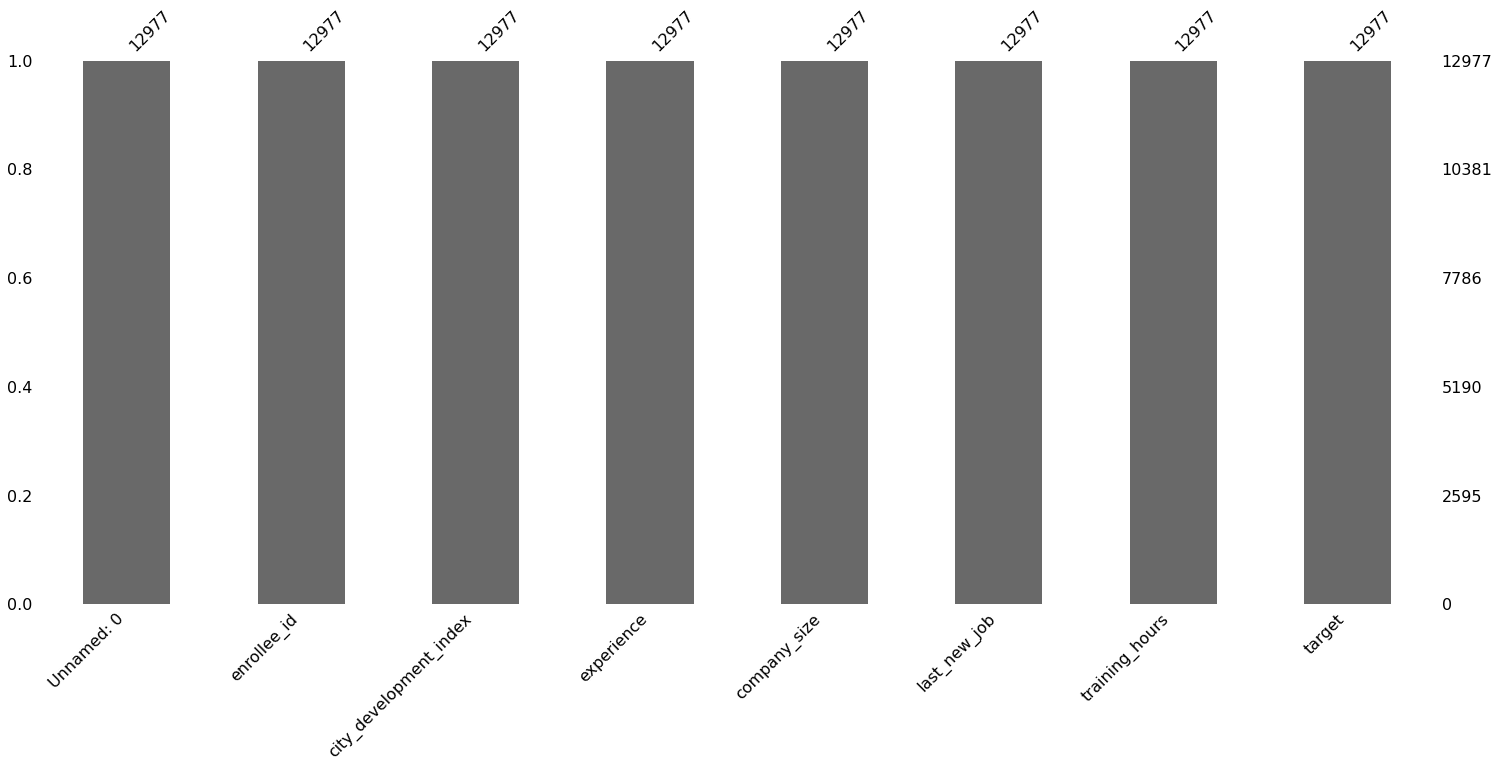

In [ ]:
msno.bar(df)

#### there is no missing data

### V. Are all the columns numeric such as float or int? If not, please convert them to numeric (int/float) before going to the next step.

In [ ]:
## importing library to check for numeric data
from pandas.api.types import is_numeric_dtype

In [ ]:
column_names = df.columns.values.tolist()

column_names

['Unnamed: 0',
 'enrollee_id',
 'city_development_index',
 'experience',
 'company_size',
 'last_new_job',
 'training_hours',
 'target']

In [ ]:
for name in column_names: 
    x = is_numeric_dtype(df[name])
    print(x)
    if x != True:
        print("not numerical", name)
    
    

True
True
True
True
True
True
True
True


#### As we can see all the columns are numerical

In [ ]:
### dropped unnamed per professor recommandation in the discussion board

df = df.iloc[: , 1:]

df.head(5)

,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target
0,29725,0.776,15,2,5,47,0
1,666,0.767,21,2,4,8,0
2,28806,0.920,5,2,1,24,0
3,402,0.762,13,0,5,18,1
4,27107,0.920,7,2,1,46,1


### VI.  plot the heatmap with correlations to get some more idea about the data.

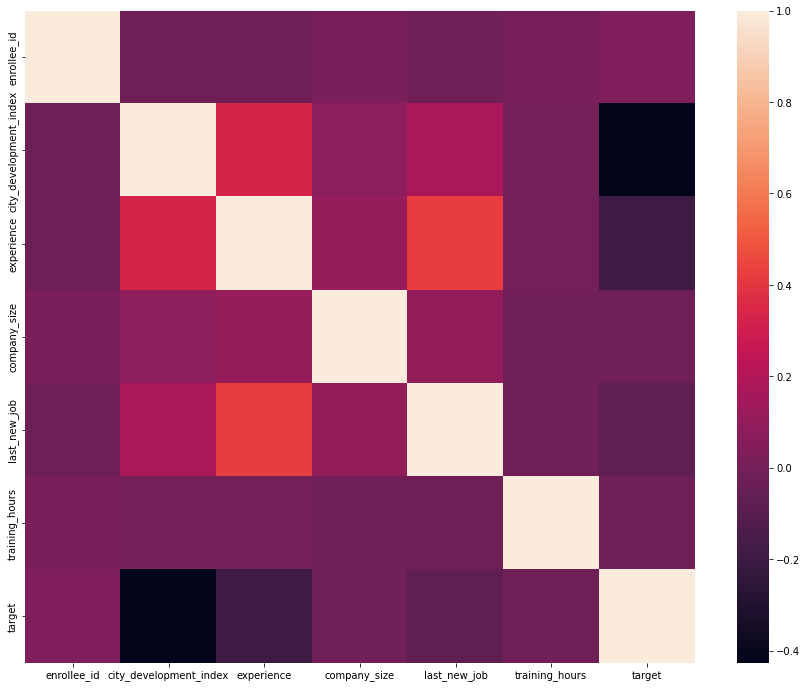

In [ ]:
correlation = df.corr()
plt.figure(figsize = (15, 12))
sns.heatmap(correlation)

## 2.   Feature Selection and Pre-processing 

### I. Put all the data from the dataframe into X, except the enrolle_id and the target columns

In [ ]:
X = df.drop(columns=['target', 'enrollee_id'])
X_column_names = X.columns.values.tolist()
X_column_names

['city_development_index',
 'experience',
 'company_size',
 'last_new_job',
 'training_hours']

In [ ]:
X.head(5)

,city_development_index,experience,company_size,last_new_job,training_hours
0,0.776,15,2,5,47
1,0.767,21,2,4,8
2,0.920,5,2,1,24
3,0.762,13,0,5,18
4,0.920,7,2,1,46


### II. Perform feature scaling on the data of X with StandardScaler and show some sample data from X after scaling (Use the technique shown in the second answer from this post: https://stackoverflow.com/questions/44552031/sklearnstandardscaler-can-i-inverse-the-standardscaler-for-the-model-output (Links to an external site.) )

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

col_names = list(X.columns.values)
scaler = StandardScaler()
scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled, columns=col_names)

X_scaled.head(10)


,city_development_index,experience,company_size,last_new_job,training_hours
0,-0.503422,0.633957,-0.574723,1.690762,-0.308396
1,-0.578413,1.546009,-0.574723,1.081137,-0.951805
2,0.696434,-0.886130,-0.574723,-0.747739,-0.687842
3,-0.620075,0.329940,-1.488268,1.690762,-0.786828
4,0.696434,-0.582112,-0.574723,-0.747739,-0.324894
5,0.696434,0.937974,1.709140,1.690762,0.945427
6,0.696434,-0.886130,1.252367,-0.747739,0.697962
7,0.638108,1.546009,0.795595,0.471512,-0.704340
8,0.746428,0.785966,-1.031496,1.690762,-0.786828
9,0.696434,-1.494164,-0.574723,-1.357364,0.664966


## 3. KMeans Clustering

### I. Import related library for Kmeans and perform Kmeans on X (note that it was scaled already). Make sure to put random_state = 47 (it can be any number, but use 47 so that you will produce almost the same result as us). Use k-means++ for the initial centroids. You should know from the problem description how many clusters we are interested in.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = "k-means++", random_state = 47)
kmeans.fit(X_scaled)

KMeans(n_clusters=2, random_state=47)

### II. Show the cluster centers as it is and then inverse the scale and show the centers. Please explain in words about the centers relating them to the columns of the data set

In [ ]:
identified_clusters = kmeans.fit_predict(X_scaled)
identified_clusters

array([1, 1, 0, ..., 0, 1, 0], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[-0.31364817, -0.63941844, -0.15207764, -0.55076921,  0.01170319],
       [ 0.44177356,  0.90062111,  0.21420141,  0.77575864, -0.01648395]])

In [ ]:
inversed = scaler.inverse_transform(X_scaled)
kmeans2 = KMeans(n_clusters = 2, init = "k-means++", random_state = 47)
kmeans2.fit(X)
inversed_clusters = kmeans2.fit_predict(X)
inversed_clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
kmeans2.cluster_centers_

array([[  0.83639888,  10.83377685,   3.26905531,   2.23474625,
         41.97690553],
       [  0.83649939,  10.81099796,   3.21181263,   2.19144603,
        167.34052953]])

In [ ]:
inversed2 = scaler.inverse_transform(kmeans.cluster_centers_)
print(inversed2)

[[ 0.7987756   6.62300698  2.9252866   1.32309922 66.4026881 ]
 [ 0.88943708 16.75426875  3.72717149  3.49907201 64.69413512]]


##### The cluster centers is the arithmetic mean of all the points belonging to the cluster.  In this case we have 2 cluster centers becase we clusters our data into 1, 0 (two clusters).  Each array has 6 elements, each element is the mean of all the points within the cluster within that specific column.  Since we have 6 clomuns we have 6 elements in each cluster center.  Cluster center could be part of data set or a new imgainary data based on what the calculation of mean comes to.  As we can see for the scaled data the cluster are much more further apart compared to the unscaled data. This shows scaling has helped with differenation and segrating the two clusters better.  

#### Note: I did the inverse scaler both on cluster center as well as inversing the scaled data and getting centers that way.  


### III.  Show the distance matrix

In [ ]:
kmeans.transform(X_scaled) 

array([[2.6387601 , 1.58409296],
       [2.93535149, 1.74579189],
       [1.3371321 , 2.57904978],
       ...,
       [1.51732572, 2.56222519],
       [2.96221279, 1.14612076],
       [1.2962834 , 2.85511871]])

### IV. Show the labels 

In [ ]:
pd.set_option('display.max_rows', None)
print(identified_clusters)

[1 1 0 ... 0 1 0]


### V. Add a new column to your data frame called cluster_label and assign the cluster label for the instances based on the K-means cluster label

In [ ]:
df['cluster_label'] = identified_clusters


In [ ]:
df.head(10)

,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target,cluster_label
0,29725,0.776,15,2,5,47,0,1
1,666,0.767,21,2,4,8,0,1
2,28806,0.920,5,2,1,24,0,0
3,402,0.762,13,0,5,18,1,1
4,27107,0.920,7,2,1,46,1,0
5,699,0.920,17,7,5,123,0,1
6,23853,0.920,5,6,1,108,0,0
7,25619,0.913,21,5,3,23,0,1
8,6588,0.926,16,1,5,18,0,1
9,4167,0.920,1,2,0,106,0,0


### VI. The target column of our data frame is floating-point numbers. So, this number is not comparable with the cluster label. Add a column target_int and write a function or use a strategy to store the int version of the target column into the target_int column (For example, 1.0 in the target will be 1 in the target_int, 0.0 will be 0)

In [ ]:
target_type = df['target'].dtypes
print(target_type)

int64


#### Note:somehow my target is already int but I have performed the operation below to demonstrate the conversion

In [ ]:
target_int = np.int64(df['target'])
df['target_int'] = target_int



### VII. Show the top 5 rows of the dataframe now that shows you have added those two columns and they have the correct values


In [ ]:
df.head(5)

,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target,cluster_label,target_int
0,29725,0.776,15,2,5,47,0,1,0
1,666,0.767,21,2,4,8,0,1,0
2,28806,0.920,5,2,1,24,0,0,0
3,402,0.762,13,0,5,18,1,1,1
4,27107,0.920,7,2,1,46,1,0,1


### VIII. Now, we would like to compare the cluster label with the ground truth. Print confusion matrix that compares the target_int and the cluster_label, show the classification_report, and then show the total number of misclassification.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(df['target_int'], df['cluster_label']))

[[5835 4860]
 [1747  535]]


In [ ]:
tn, fp, fn, tp = confusion_matrix(df['target_int'], df['cluster_label']).ravel()
tn, fp, fn, tp

(5835, 4860, 1747, 535)

In [ ]:
print(classification_report(df['target_int'], df['cluster_label']))

              precision    recall  f1-score   support

           0       0.77      0.55      0.64     10695
           1       0.10      0.23      0.14      2282

    accuracy                           0.49     12977
   macro avg       0.43      0.39      0.39     12977
weighted avg       0.65      0.49      0.55     12977



In [ ]:
num =  (df['target_int'] != df['cluster_label']).sum()

print("total number of misclassification", num)



total number of misclassification 6607


### IX. Discuss the numbers from 3 Viii and any thoughts on it.

#### Confusuin Matric Interpreation :
#### we have 5835  instances if true negative. It means the target test was 0 and we predicted 0
#### we have 535 instances if true positive. It means the target test was 1 and we predicted 1
#### we have 1747   instances of false negative. It means in 1747 of instaces the target test was 1 but we predicted it as 0
#### we have 4860 instances if false postive. It means the in 4860 cases target test was 0 and we predicted 1
#### we can calculate precision , recall , accuracy and f1 scores with this. Each have a formula. ie. recall = TP/(TP+FN), precision = TP/(TP+FP), Accuracy = (TP+TN)/(TP+TN+FN+FN), F1 = 2(precisionrecall) / (precision+recall).
#### when it comes to precision of 1 we are only 10% accurate which is exteremly low.  This means are model is doing terrible in classifying 1s.  This is due to under representation of number of 1 instances in our data.  Our precision is much higher for prediction 0 as 77% this means are model is doing much better classifying instances that are 0.  This is again becuase our data has much hevaier concentration of 0s so the training model is bias to 0. It predicts it better.  As it can be seen we have 1747 instances of false negative where are 4860 instances of false postive 

### X. Show the inertia of the cluster

In [ ]:
print(kmeans.inertia_)

49643.86379769514


### XI. What is the elbow method and what is its purpose of it in the case of KMeans clustering?

#### To be able to Choose The Right Number Of Clusters we use elbow method as following:
#### 1) we first run K_means on a data with a range of different Ks (for example a range between (1 to 20)
#### 2) For each k we will calculated the WCSS (Stands for the sum of the squares of distances of the data points in each and every cluster from its centroid. (WCSS is also known as Inertia)
#### 3) then we will create a graph between wCSS and K values
#### 4) we will observe that there is a sharp bend at the graph resembling an elbow
#### 5) The K associated with the point where the elbow is the best value of K.


### XII. Although we just wanted 2 clusters, we still would like to see what will happen if you increase the number of clusters. Plot the inertia for the different numbers of clusters from 2 to 20. 

Text(0, 0.5, 'WCSS')

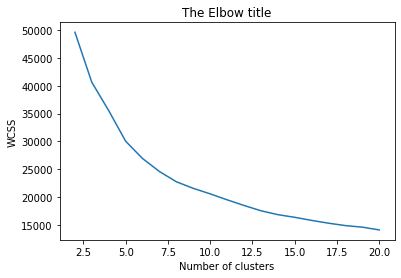

In [ ]:
wcss=[]
for i in range(2,21):
  kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 47)
  kmeans.fit(X_scaled)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(2,21)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

### XIII. Show a scatter plot with training hours against experience where the points should be colored based on the two cluster labels. Write any thoughts on this plot.

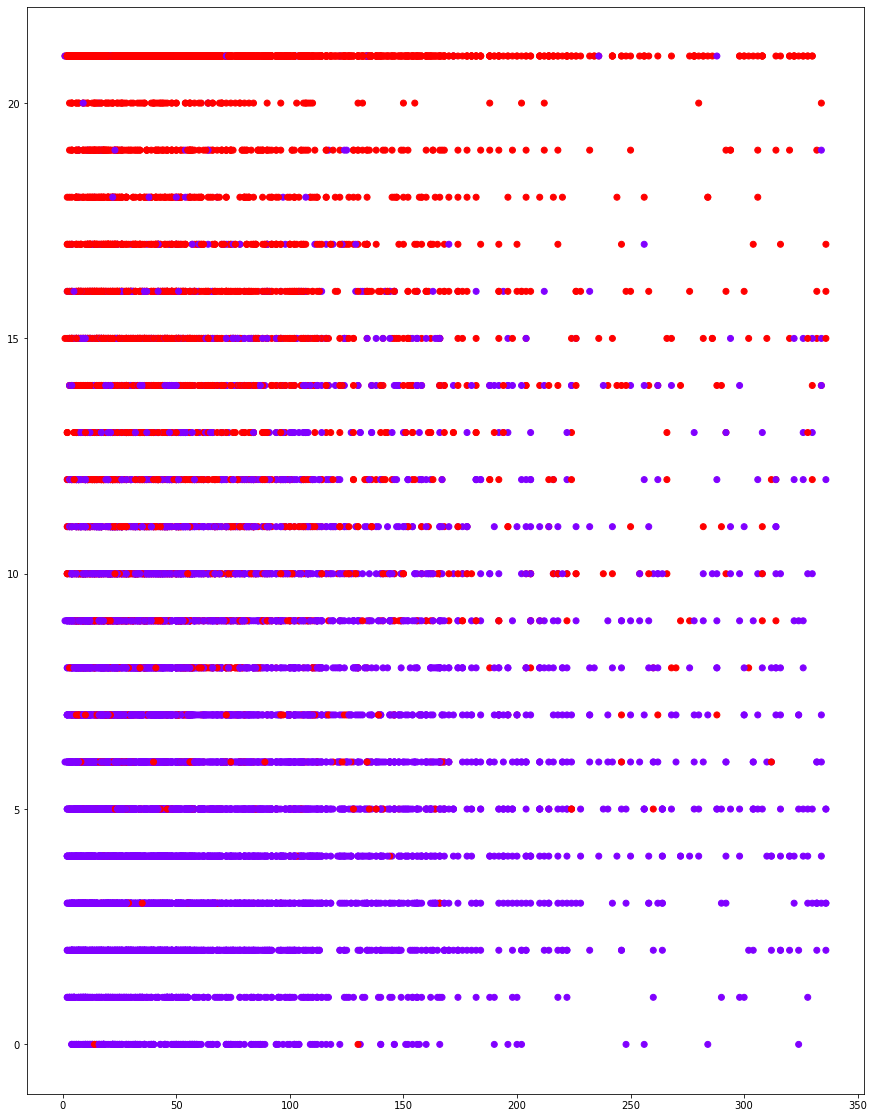

In [ ]:
plt.figure(figsize=(15, 20))  
cluster = df['cluster_label']
plt.scatter(df['training_hours'], df['experience'], c=cluster, cmap='rainbow') 

#### looks like training hours are not linearly corelated.  The data has been split into the two clusters. most of people with 15+ or so years of experince  are in one cluster and 15- are in another.  The cluster do not seem to change hugely by number of hours.  usually when a line  lets is at experince 5 and its purple it remains purple for all the training hours. So seems like training hours are not that releant

### XIV. Show a scatter plot with any other two attributes you are interested in like 3 Xiii and add your thoughts on your plot as well

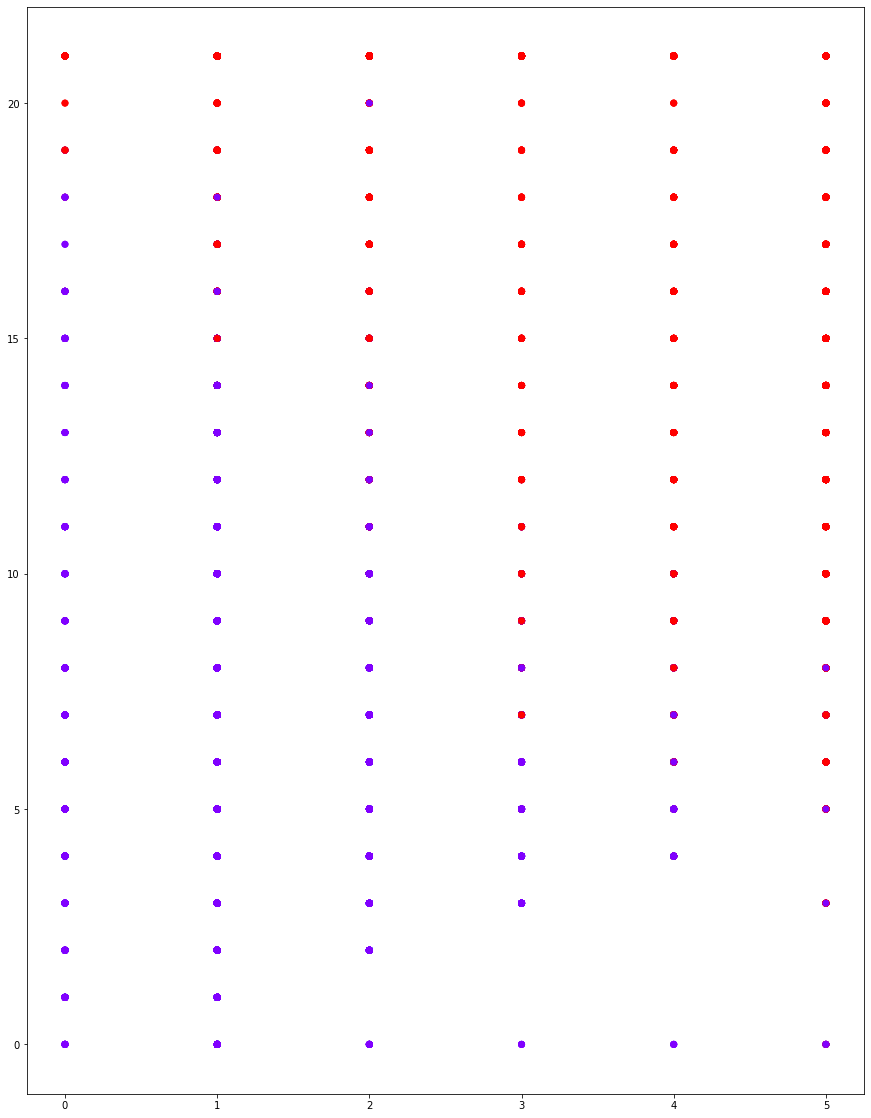

In [ ]:
plt.figure(figsize=(15, 20))  
cluster = df['cluster_label']
plt.scatter(df['last_new_job'], df['experience'], c=cluster, cmap='rainbow') 

#### Looks like the less number  that has passed from last new job the more likely the clusters are within purple. For exaple when last new job was 5  the clusters are mainly red regardless of years of exprince and when the last new job is 0 clusters of purple regardless of years of experice.  So it looks like the data is heavily correleted with last new job in terms of clustering

## 4. AgglomerativeClustering (Helping recourse for the relevant codes:  https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/

### I. Plot a dendrogram (make the figure size relatively big, but still you will not be able to see it completely. However, it least this will give you an idea on how many cluster would you like to generate)

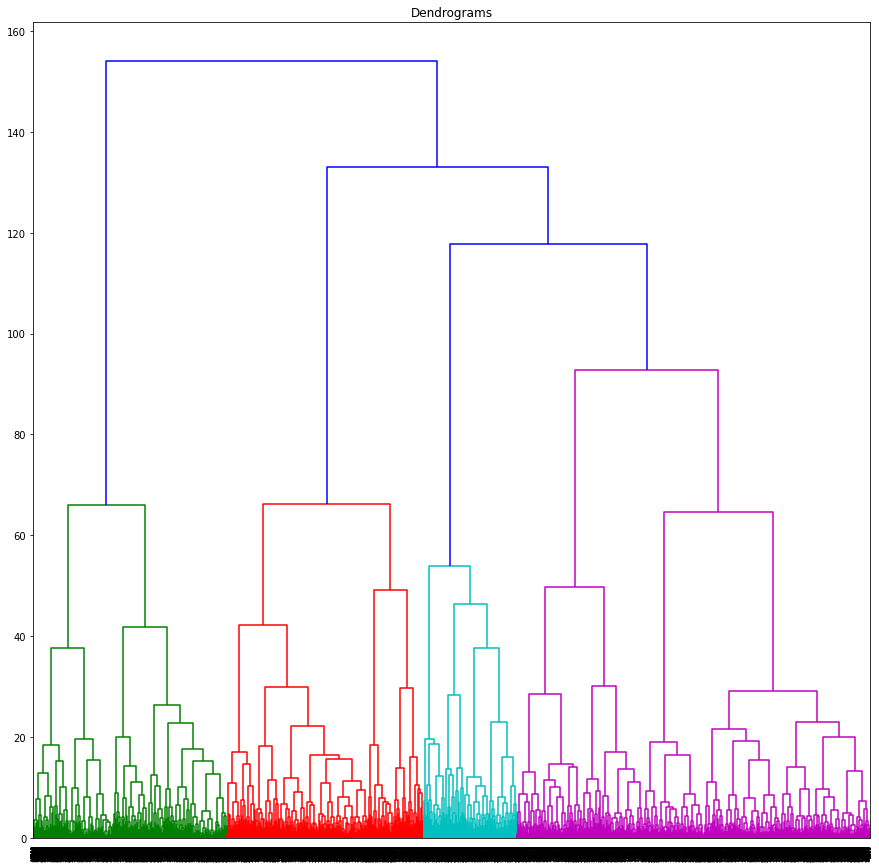

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15, 15))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))

### II. Perform AgglomerativeClustering with 2 clusters first, and use euclidean distance for affinity and linkage = 'ward' 

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
pred = cluster.fit_predict(X_scaled)
print(pred)

[1 1 0 ... 0 1 0]


### III. After creating the clusters, plot training hours against experience like 3.Xiii and discuss if anything interesting 

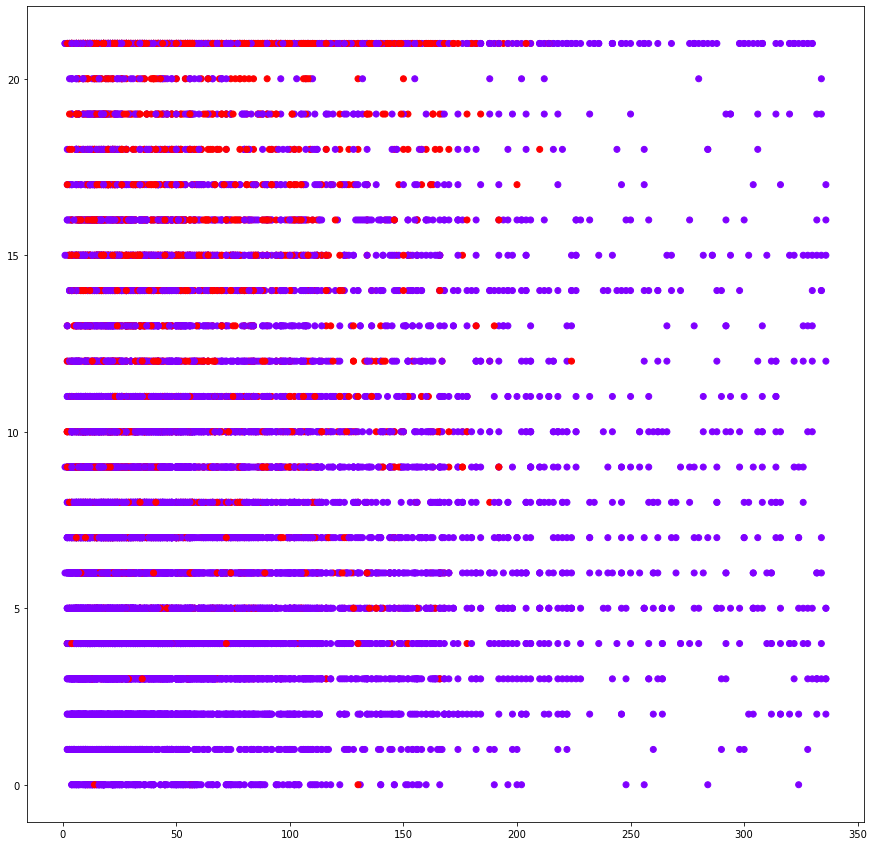

In [ ]:
plt.figure(figsize=(15, 15))  
cluster2 = pred
plt.scatter(df['training_hours'], df['experience'], c=cluster2, cmap='rainbow') 

### In the prevouse scatter plot was very uniform along the vertical lin. most data over 15 were red and below 15 were purple. Here that has changed.  We have more of a mixed data.  Each horizantal line is now a mix of red and purple.   experince 21 which was previously almost completely one cluster is now almost half and half.  So now we see right side is mainly purple and lest side is mainly purple from and 11 and below and mostly red from 12 and up.  So looks like with 200+ training hours most clusters are now purple.  This was a relationship we could not see clearly in the other graph.  In the other plot looked like the clustering was not so much depandant on training hours and changed heavily with years of experince.  But here we can see the clusters changing with training hours as well.  If experince is more that 12 and training hours less than 200 we see more red.  Training hours less than 200 and experience less than 11 is mostly cluster purple.  training hours more than 200 mostly cluster purple regardless of experince years


### IV. Then, increase the number of clusters to 4 or 5 and build the clusters again and plot them again to see any difference.

In [ ]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
pred = cluster.fit_predict(X_scaled)
print(pred)

[1 1 0 ... 0 1 0]


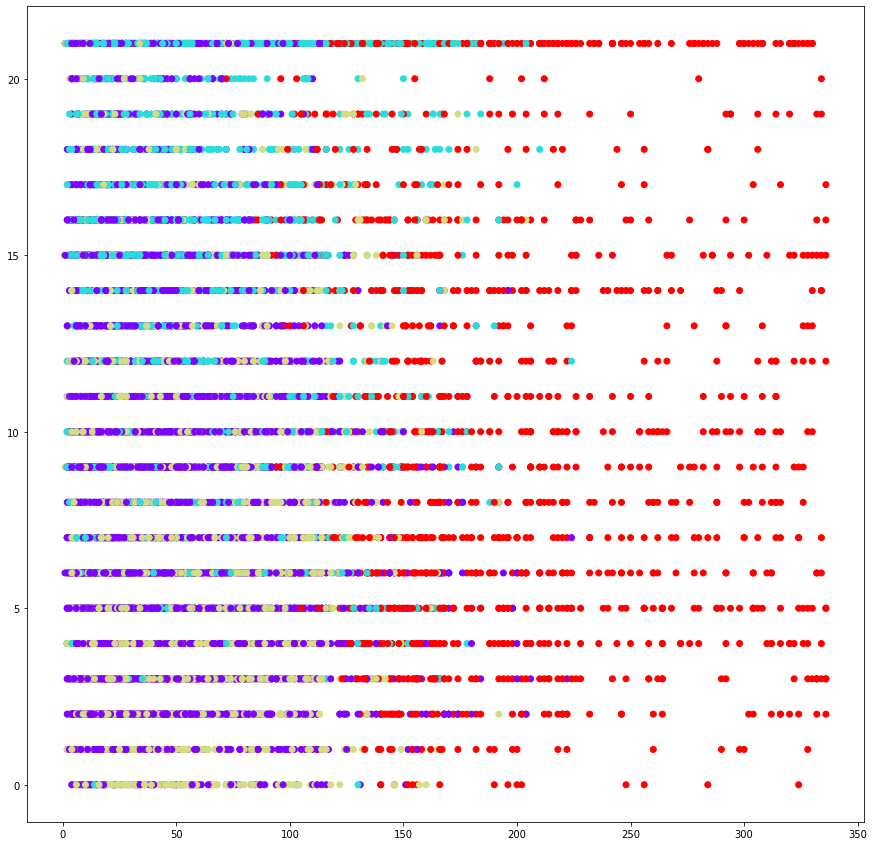

In [ ]:
plt.figure(figsize=(15, 15))  
cluster2 = pred
plt.scatter(df['training_hours'], df['experience'], c=cluster2, cmap='rainbow') 

In [ ]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
pred = cluster.fit_predict(X_scaled)
print(pred)


[1 1 2 ... 2 1 2]


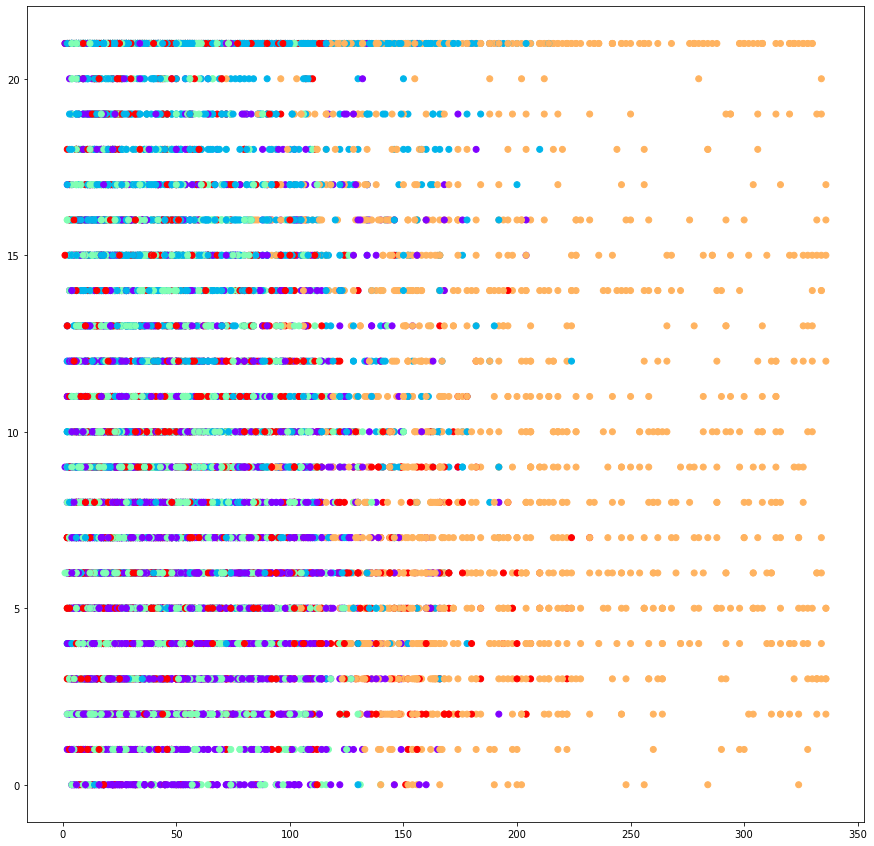

In [ ]:
plt.figure(figsize=(15, 15))  
cluster2 = pred
plt.scatter(df['training_hours'], df['experience'], c=cluster2, cmap='rainbow') 

#### Looks like as we add more numbers of clusters the right side still stays fairly uniform in terms of the cluster. So looks like adding more clusters segments the data from around 200 trarining hours and below while the cluster is mainly uniform for all istances that are 200+ raining hours regardless of years of experince.  